# Import the libraries


In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [80]:
df=pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# Remove the unrelated features
- removing columns
    - Number_of_casualties :- This is only known after the accident.
    - Duplicate of target variable Accident_severity.
    - Fitness_of_casuality :- Measured after the accident (whether casualty was fit/unfit at hospital).
    - Work_of_casuality :- Doesn’t logically affect accident severity → weak correlation.
    - Sex_of_casualty :- Gender of the injured person doesn’t influence accident severity as strongly as environmental or driver-related factors.
    - Owner_of_vehicle :- Already captured indirectly by Vehicle_driver_relation (e.g., owner vs hired driver).

In [81]:
print(df.isnull().sum()/df.shape[0]*100
)

Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

### Remobve the
- Time column
- Day_of_week
- Service_year_of_vehicle
- Defect_of_vehicle       
- Work_of_casuality              
- Fitness_of_casuality   do to large amount of missing values of data set

In [82]:
df.drop(columns=['Time','Day_of_week','Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality'],inplace=True)
print(df.columns)
print(df.isnull().sum())

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                14

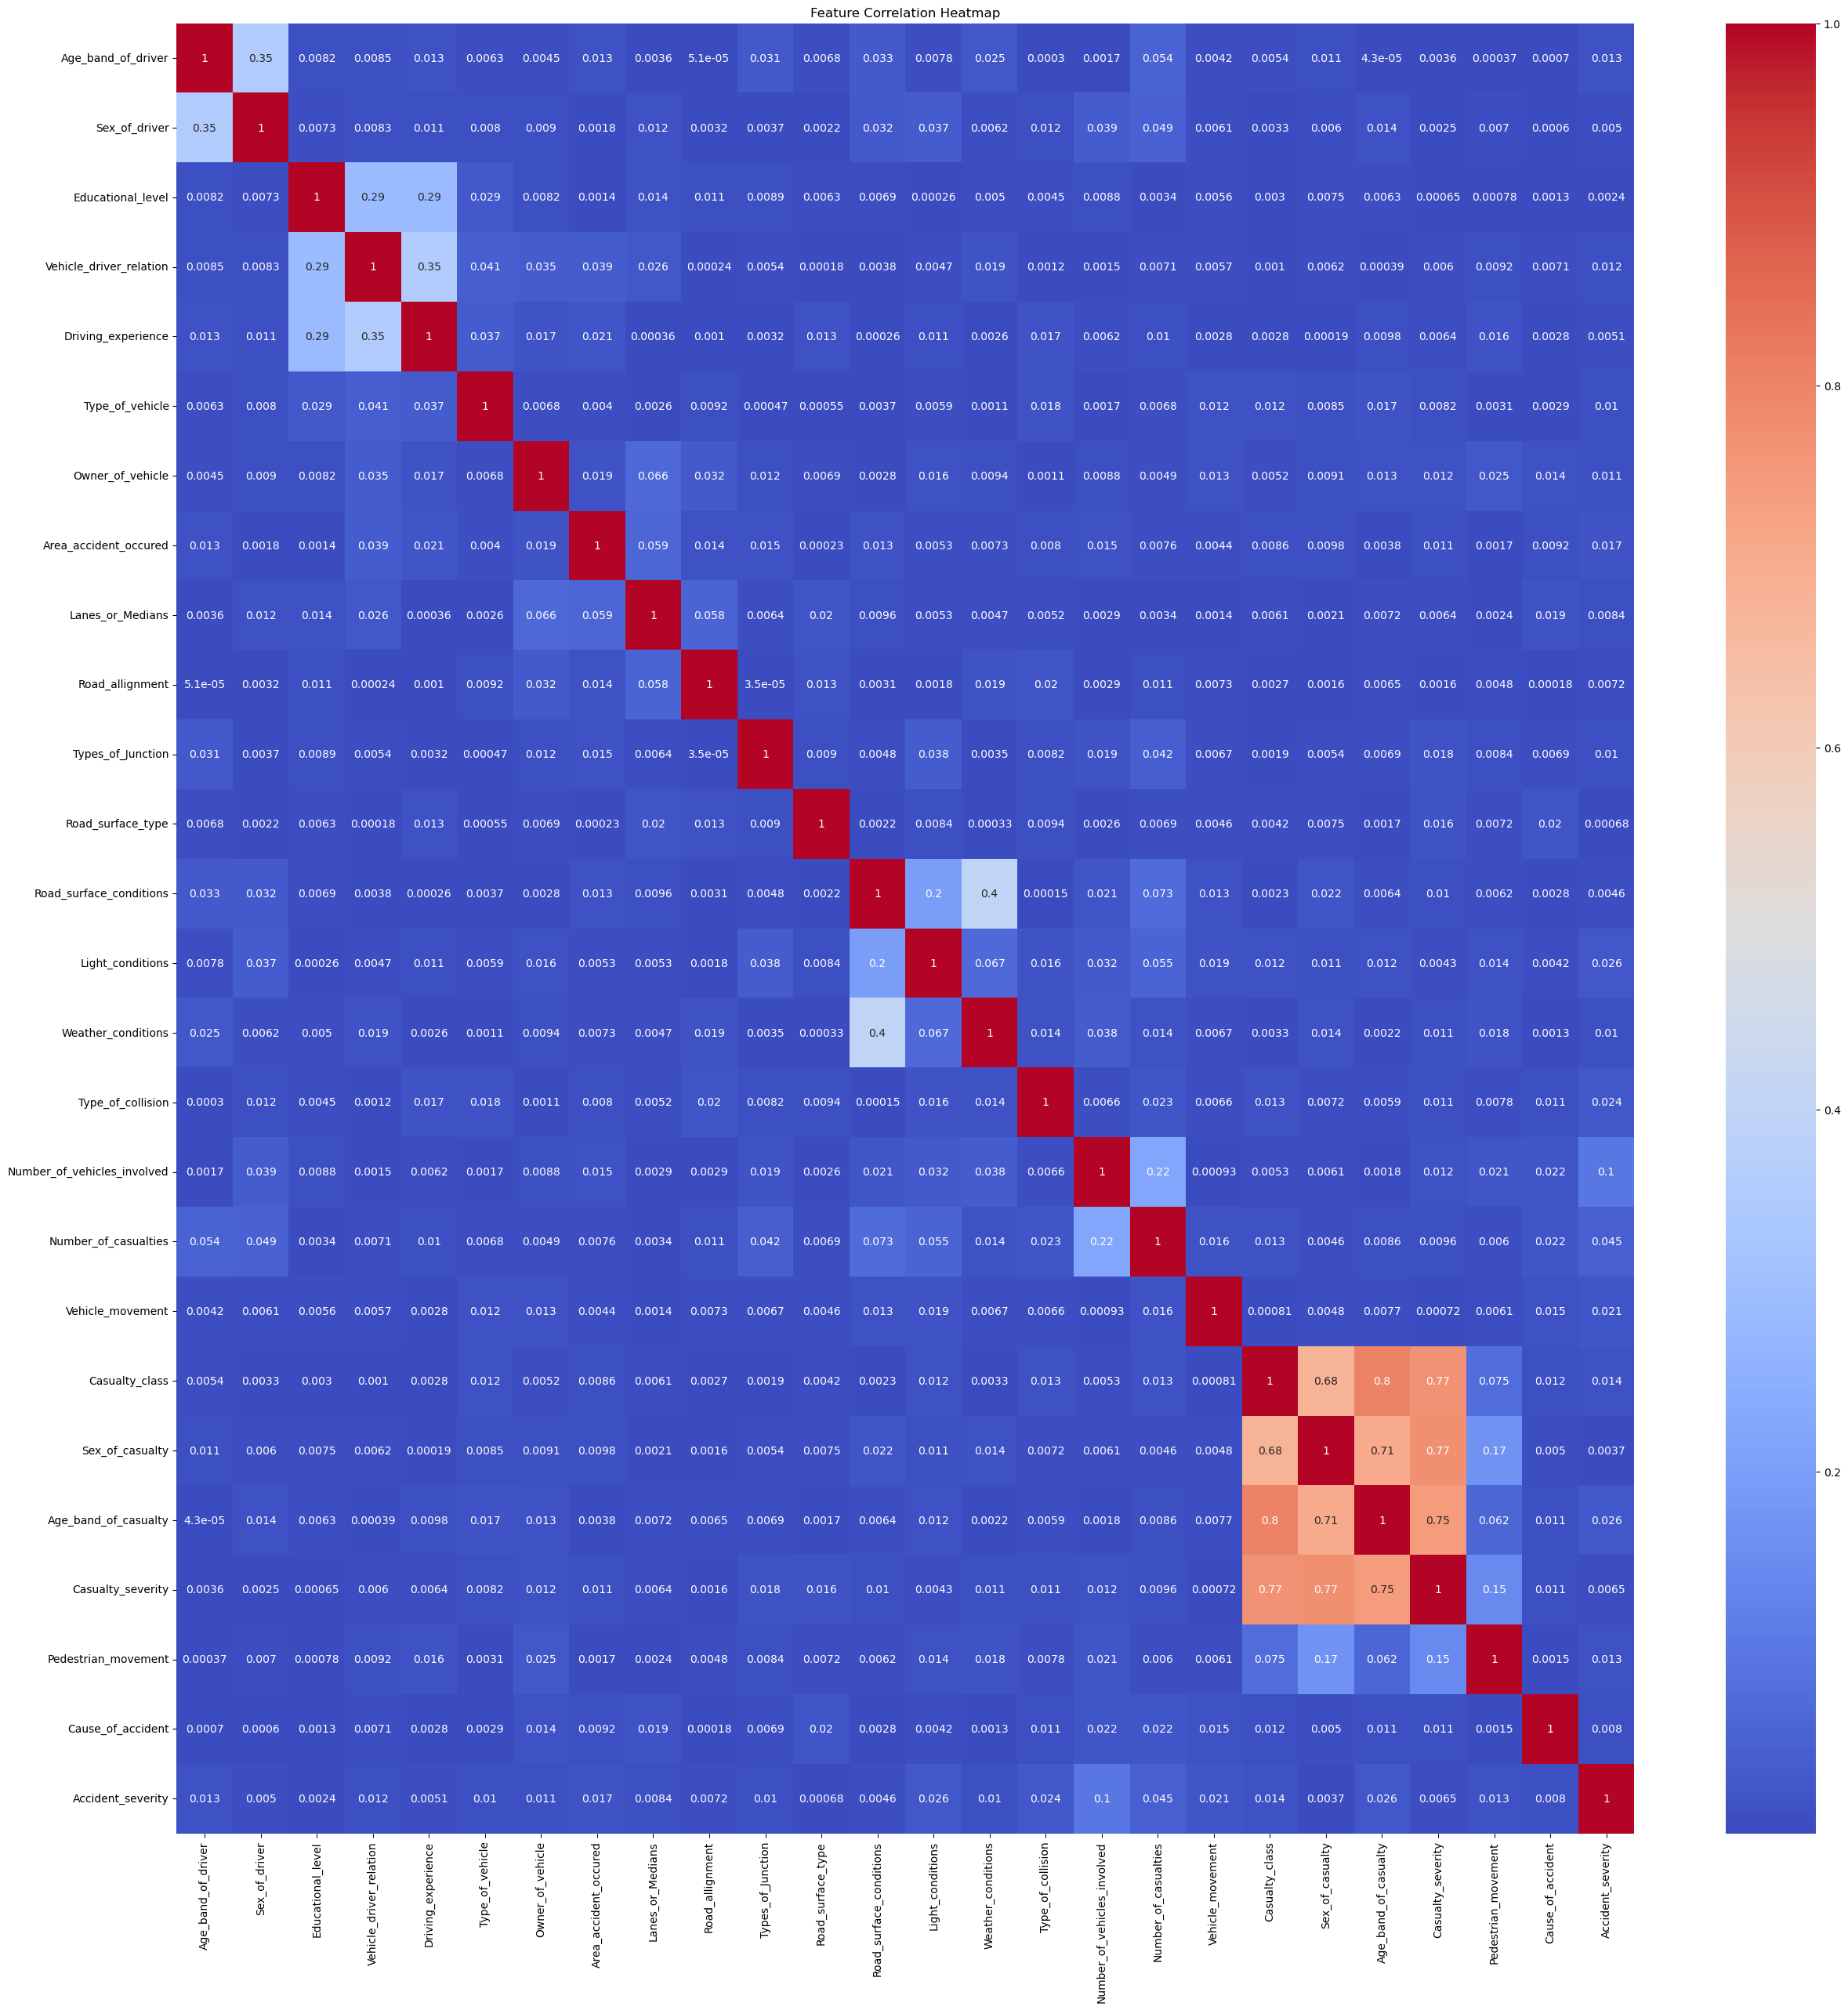

Highly correlated columns to drop: ['Age_band_of_casualty']
Shape before: (12316, 25)


In [83]:
dd=df.copy()
le=LabelEncoder()
for col in dd.columns:
    if dd[col].dtype!='number':
        dd[col]=le.fit_transform(dd[col].astype(str))



# Step 2: Compute correlation matrix
corr_matrix = dd.corr().abs()

# Step 3: Visualize correlation heatmap (optional, for understanding)
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 4: Select upper triangle (avoid duplicate correlations)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 5: Identify columns with correlation above a threshold (e.g. 0.8)
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Highly correlated columns to drop:", to_drop)

# Step 6: Drop those columns
df_reduced = df.drop(columns=to_drop,inplace=True)

print("Shape before:", df.shape)


In [ ]:
# preprocessing steps 
# 1. Handle missing values
# 2. Remove the unrelated features
# 2. Encode categorical variables
# 3. Normalize/Standardize numerical features
# 4. Feature engineering (if necessary)
# 5. Split the data into training and testing sets


df.drop(columns=['Owner_of_vehicle',
                 'Road_allignment','Road_surface_conditions','Number_of_casualties',
                 'Casualty_class','Sex_of_casualty','Casualty_severity'
                 ], inplace=True)

In [84]:
df.shape


(12316, 25)

In [88]:
print(df.isnull().sum())

Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              664
Vehicle_driver_relation        511
Driving_experience             742
Type_of_vehicle                866
Owner_of_vehicle                 0
Area_accident_occured          153
Lanes_or_Medians               324
Road_allignment                 88
Types_of_Junction              851
Road_surface_type              167
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              152
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               297
Casualty_class                   0
Sex_of_casualty                  0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64


In [102]:
print(df['Owner_of_vehicle'].unique())
df.drop(df[df['Owner_of_vehicle']=='Other'].index, inplace=True)
df.drop(df[df['Owner_of_vehicle'].isna()].index, inplace=True)
print(df['Road_allignment'].unique())
df.drop(df[df['Road_allignment'].isna()].index, inplace=True)
print(df['Road_surface_conditions'].unique())
print(df['Road_surface_conditions'].unique())
print(df['Number_of_casualties'].unique())
print(df['Casualty_class'].unique())
df.drop(df[df['Casualty_class']=='na'].index, inplace=True)
print(df['Sex_of_casualty'].unique())
print(df['Casualty_severity'].unique())



['Governmental' 'Owner' 'Organization']
['Tangent road with mild grade and flat terrain'
 'Tangent road with flat terrain' 'Escarpments'
 'Tangent road with rolling terrain' 'Gentle horizontal curve'
 'Tangent road with mountainous terrain and'
 'Steep grade downward with mountainous terrain' 'Sharp reverse curve'
 'Steep grade upward with mountainous terrain']
['Dry' 'Wet or damp' 'Snow' 'Flood over 3cm. deep']
['Dry' 'Wet or damp' 'Snow' 'Flood over 3cm. deep']
[2 1 3 4 6 5 8 7]
['Pedestrian' 'Passenger' 'Driver or rider']
['Female' 'Male']
['3' '2' '1']


['Dry' 'Wet or damp' 'Snow' 'Flood over 3cm. deep']
[2 1 3 4 6 5 8 7]
['Pedestrian' 'Driver or rider' 'Passenger']
['Female' 'Male']
['3' '2' '1']


In [101]:
#handle the Age band od driver missing values
print(df['Age_band_of_driver'].unique())
df.drop(df[df['Age_band_of_driver']=='Unknown'].index, inplace=True)

# handle the education level missing values by replacing with age group
print(df['Educational_level'].unique())
df['Educational_level'].fillna('Unknown', inplace=True)


# remove the missing values
df=df.dropna(subset=['Vehicle_driver_relation'])
df.drop(df[df['Vehicle_driver_relation']=='Unknown'].index, inplace=True)
# handle the vehicle driver relational missing values
print(df['Vehicle_driver_relation'].unique())

# validate the driving experiance column
print(df['Driving_experience'].unique())
# fill by Unknown 
df['Driving_experience'].fillna('Unknown', inplace=True)


# handle the Type_of_vehicle missing values
print(df['Type_of_vehicle'].unique())
df['Type_of_vehicle']=df['Type_of_vehicle'].fillna('Other')


#map to unique value for the column
map_vehicle={
    'Automobile':'Car',
    'Public (> 45 seats)':'Bus',
    'Lorry (41?100Q)':'Lorry',
    'Public (13?45 seats)':'Bus',
    'Lorry (11?40Q)':'Lorry',
    'Long lorry':'Lorry',
    'Public (12 seats)':'Lorry',
    'Taxi':'Car',
    'Pick up upto 10Q':'Lorry',
    'Stationwagen':'Car',
    'Ridden horse':'Other',
    'Bajaj':'Three_wheeler',
    'Turbo':'Three_wheeler',
    'Motorcycle':'Mootorbike',
    'Special vehicle':'Other',
    'Bicycle':'Bicycle'
}
df['Type_of_vehicle']=df['Type_of_vehicle'].replace(map_vehicle)
print(df['Type_of_vehicle'].unique())


# area Accient occur 
print(df['Area_accident_occured'].unique())
df.dropna(subset=['Area_accident_occured'], inplace=True)
df['Area_accident_occured']=df['Area_accident_occured'].str.strip()
df.drop(df[df['Area_accident_occured']=='Unknown'].index, inplace=True)


# handle the Lanes_or_Medians
print(df['Lanes_or_Medians'].unique())
df['Lanes_or_Medians'].fillna('Unknown', inplace=True)


# Handle the Types_of_Junction  missing values
print(df['Types_of_Junction'].unique())
df.dropna(subset=['Types_of_Junction'], inplace=True)
df.drop(df[df['Types_of_Junction']=='Unknown'].index, inplace=True)


# Handle the Road_surface_type missing values
print(df['Road_surface_type'].unique())
df.dropna(subset=['Road_surface_type'], inplace=True)


print(df['Weather_conditions'].unique())
df.drop(df[df['Weather_conditions']=='Unknown'].index, inplace=True)


# handle the type of colision
print(df['Type_of_collision'].unique())
df.dropna(subset=['Type_of_collision'], inplace=True)
df.drop(df[df['Type_of_collision']=='Unknown'].index, inplace=True)

# Handle the Light_conditions 
print(df['Light_conditions'].unique())

# handle the Vehicle_movement
print(df['Vehicle_movement'].unique())
df.dropna(subset=['Vehicle_movement'], inplace=True)
df.drop(df[df['Vehicle_movement']=='Unknown'].index, inplace=True)


# Handle the Pedestrian_movement  column
print(df['Pedestrian_movement'].unique())
print(df['Pedestrian_movement'].value_counts())

# Handle the Cause_of_accident 
print(df['Cause_of_accident'].unique())

print(df['Light_conditions'].unique())

['18-30' '31-50' 'Over 51' 'Unknown' 'Under 18']
['Junior high school' 'Above high school' 'Elementary school' nan
 'High school' 'Unknown' 'Writing & reading' 'Illiterate']
['Employee' 'Owner' 'Other']
['5-10yr' '2-5yr' 'Above 10yr' '1-2yr' 'No Licence' 'Below 1yr' nan
 'unknown']
['Public (> 45 seats)' 'Automobile' 'Lorry (41?100Q)' 'Long lorry'
 'Lorry (11?40Q)' 'Public (12 seats)' 'Taxi' nan 'Public (13?45 seats)'
 'Ridden horse' 'Stationwagen' 'Other' 'Pick up upto 10Q' 'Bajaj' 'Turbo'
 'Motorcycle' 'Special vehicle' 'Bicycle']
['Bus' 'Car' 'Lorry' 'Other' 'Three_wheeler' 'Mootorbike' 'Bicycle']
['Office areas' 'Residential areas' ' Industrial areas' ' Church areas'
 '  Recreational areas' 'Other' 'Rural village areas'
 ' Outside rural areas' ' Hospital areas' nan 'School areas'
 '  Market areas' 'Rural village areasOffice areas' 'Recreational areas']
['other' 'Undivided Two way' 'One way' 'Double carriageway (median)'
 'Two-way (divided with broken lines road marking)' nan
 'Two-

# Change to lowercase

In [103]:
df.head()
df['Age_band_of_driver']=df['Age_band_of_driver'].str.lower()
df['Sex_of_driver']=df['Sex_of_driver'].str.lower()
df['Educational_level']=df['Educational_level'].str.lower()
df['Vehicle_driver_relation']=df['Vehicle_driver_relation'].str.lower()
df['Driving_experience']=df['Driving_experience'].str.lower()
df['Type_of_vehicle']=df['Type_of_vehicle'].str.lower()
df['Area_accident_occured']=df['Area_accident_occured'].str.lower()
df['Lanes_or_Medians']=df['Lanes_or_Medians'].str.lower()
df['Types_of_Junction']=df['Types_of_Junction'].str.lower()
df['Road_surface_type']=df['Road_surface_type'].str.lower()
df['Light_conditions']=df['Light_conditions'].str.lower()
df['Weather_conditions']=df['Weather_conditions'].str.lower()
df['Type_of_collision']=df['Type_of_collision'].str.lower()
df['Vehicle_movement']=df['Vehicle_movement'].str.lower()
df['Pedestrian_movement']=df['Pedestrian_movement'].str.lower()
df['Cause_of_accident']=df['Cause_of_accident'].str.lower()
df['Number_of_vehicles_involved']=df['Number_of_vehicles_involved'].astype(int)
df['Owner_of_vehicle']=df['Owner_of_vehicle'].str.lower()
df['Road_allignment']=df['Road_allignment'].str.lower()
df['Road_surface_conditions']=df['Road_surface_conditions'].str.lower()
df['Casualty_class']=df['Casualty_class'].str.lower()
df['Sex_of_casualty']=df['Sex_of_casualty'].str.lower()

# Remove the duplicated raws

In [104]:
print(df.duplicated().sum())
# drop the duplicates
df.drop_duplicates(inplace=True)

1


In [105]:
print(df.head())


   Age_band_of_driver Sex_of_driver   Educational_level  \
3               18-30          male  junior high school   
8               18-30          male  junior high school   
9               18-30          male  junior high school   
11              31-50          male   above high school   
14              31-50          male  junior high school   

   Vehicle_driver_relation Driving_experience Type_of_vehicle  \
3                 employee             5-10yr             bus   
8                 employee         above 10yr           lorry   
9                 employee              1-2yr             car   
11                employee         no licence             car   
14                employee         above 10yr             car   

   Owner_of_vehicle Area_accident_occured   Lanes_or_Medians  \
3      governmental          office areas              other   
8             owner      industrial areas              other   
9             owner     residential areas  undivided two way  

In [21]:
print(df['Pedestrian_movement'].unique())

['not a pedestrian' "crossing from driver's nearside"
 'crossing from nearside - masked by parked or stationot a pedestrianry vehicle'
 'unknown or other'
 'crossing from offside - masked by  parked or stationot a pedestrianry vehicle'
 'in carriageway, stationot a pedestrianry - not crossing  (standing or playing)'
 'walking along in carriageway, back to traffic'
 'walking along in carriageway, facing traffic'
 'in carriageway, stationot a pedestrianry - not crossing  (standing or playing) - masked by parked or stationot a pedestrianry vehicle']


In [ ]:

cols_to_save = [
    'Owner_of_vehicle',
    'Road_allignment',
    'Road_surface_conditions',
    'Number_of_casualties',
    'Casualty_class',
    'Sex_of_casualty',
    'Casualty_severity'
]

# Select only those columns
selected_df = df[cols_to_save]

# Save to new CSV file
selected_df.to_csv('afteraccidentoccur.csv', index=False)



✅ Columns successfully saved to 'selected_columns.csv'


In [108]:
# Store the data set
categorical_cols=['Age_band_of_driver','Sex_of_driver','Educational_level',
                  'Vehicle_driver_relation','Driving_experience','Type_of_vehicle',
                  'Area_accident_occured','Lanes_or_Medians','Types_of_Junction','Road_surface_type',
                  'Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement',
                  'Pedestrian_movement','Cause_of_accident','Accident_severity','Number_of_vehicles_involved']

selected_df = df[categorical_cols]
selected_df.to_csv("RTA_preprocessed.csv", index=False)


# Transformation

In [ ]:

#label encode for the target variable
le=LabelEncoder()
categorical_cols=['Age_band_of_driver','Sex_of_driver','Educational_level',
                  'Vehicle_driver_relation','Driving_experience','Type_of_vehicle',
                  'Area_accident_occured','Lanes_or_Medians','Types_of_Junction','Road_surface_type',
                  'Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement',
                  'Pedestrian_movement','Cause_of_accident','Accident_severity']

for category in categorical_cols:
    df[category]=le.fit_transform(df[category])


df.head()
print(df.shape)
 

In [ ]:
df.to_csv("RTA_preprocessed_encoded.csv", index=False)
